# <center> Curso Machine Learning e Imágenes en Python
    
* Docentes: Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Ayudantes: Catherine Acuña y Joaquín Funes
* Colaboran: Ing. Juan Manuel López
* Ing. Axel Aguerreberry -  Ing. Sebastián Palacio

## Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones
*	**Clasificación de imágenes.**
*	**Aprendizaje automático**
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones 

**CLASE 11: 18-10-22** 

   Aprendizaje no supervisado, clustering, agrupamiento, binarizado   
    
**Imágenes necesarias: 'Campo.jpg','daisy.jpg'**


## Recordamos un poco ...


Datos:

$\underline{x}_i=(x_{i1},..,x_{im}), \, m=$ variables/medidas/características

$i=1,..,n$, $n=$ cantidad de observaciones/registros/muestras/objetos

Luego todos los datos se guardan en una matriz con $n$ filas y $m$ columnas: 

$X=\begin{bmatrix}
 x_{1 1}& \cdots  & x_{1 m}\\ 
 \vdots &  \ddots &\vdots \\
 x_{n 1}& \cdots  & x_{n m}
\end{bmatrix}$


Cuando se tiene sólo eso, es decir: $(\underline{x}_i)_{i=1..,n}$, $\rightarrow$ **Aprendizaje NO supervisado**




## Librerías necesarias

In [1]:
#librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.datasets import load_wine

In [2]:
# Librerías para Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from collections import Counter

### Datos wine

In [58]:
datos = load_wine() #base de datos la guardamos en la variable data
print(type(datos))
print(type(datos.data))
print(type(datos.feature_names))

<class 'sklearn.utils._bunch.Bunch'>
<class 'numpy.ndarray'>
<class 'list'>


In [59]:
print(np.shape(datos.data))
print(len(datos.feature_names))
print(datos.feature_names)

(178, 13)
13
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [60]:
df = pd.DataFrame(datos.data, columns=datos.feature_names)
print(df.shape)
df.head(5)

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**wine**  es un conjunto de datos clásico

Samples total	178

Dimensionality	13

Features	real, positive

Es decir, son n=178 registros (instancias o muestras) con m=13 característica/variable/feature numéricas reales positivas


(ver más detalles en https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)



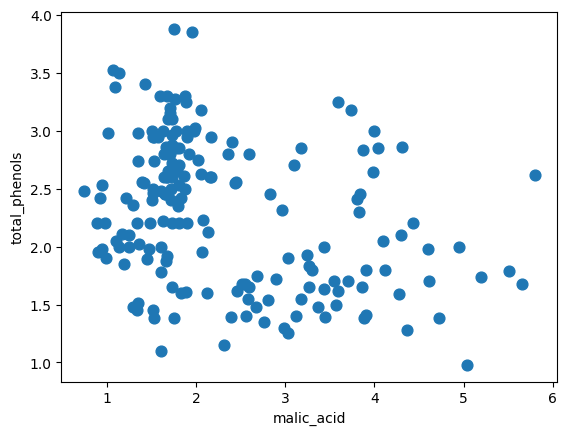

In [61]:
#scatterplot de a dos variables
var1, var2 = datos.feature_names[1] , datos.feature_names[5]#nombres de las variables/características

f1, f2 = df[var1].values, df[var2].values

plt.scatter(f1, f2, s=60)
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

## Clustering o Clasificación NO supervisada 

Consiste en la agrupación de objetos/individuos/muestras.

En Clasificación (en general) hay que identificar 
* que cosas/objetos/individuos queremos agrupar o clasificar, 
* que datos tenemos de estos (asociado a alguna problemática o interés de investigación)

Podemos diferenciar tres tipos de clasificación:

**Supervisada**, **No supervisada o Clustering**, **Semi supervisada**

En **clasificación supervisada** se requiere tener a disposición un conjunto de muestras u objetos ya clasificados (tiene que ser numeroso y representativo). Con este conjunto se aprende a clasificar nuevas muestras y es llamado conjunto de entrenamiento.

En clasificación **No supervisada**  (en estadística también llamada clustering o0 análisis de conglomerados) no se conocen a priori datos ya clasificados. Se busca descubrir la estructura que poseen los datos, encontrando los grupos (o "clases" naturales) que se presentan. 

### Clasificación no supervisada, Clustering

ver [filminas CLustering](https://docs.google.com/presentation/d/1WUbTmfqSIJgHoR3NrTUOhh5QmgG0Vu4i39L9YpiYudM/edit#slide=id.p1)

En esta ntb veremos dos algoritmos de agrupamiento: K-medias (y DBSCAN)


#### K-means o k-medias 
es un método automático de clasificación no supervisada. En este caso K es la cantidad de clases, es un hiper-parámetro del algoritmo, el usuario lo tiene que elgir a priori.
* genera aleatoriamente K centroides en el espacio m-dimensional (de las variables, dimensión m=cantidad de variables/features).
* agrupa las observaciones (filas) en K grupos por cercanía (menor distancia euclídea) a los K centroides.
* recalcula los K centroides usando el centro de masa (promedio) de cada clase.
* se repite el proceso de clasificación y recálculo de los centroides hasta la estabilidad (K grupos estables)


In [62]:
# Se agrupan los datos usando Kmedias en 4 clusters (cantidad elegida de forma arbitraria)
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [63]:
# resultados
print(kmeans.labels_)
print(kmeans.labels_.shape)

[2 2 1 1 0 1 1 1 2 2 1 1 1 1 1 1 1 2 1 2 0 0 2 2 2 2 1 1 2 2 1 1 2 1 2 2 2
 2 2 0 0 2 2 0 2 2 2 2 2 1 1 1 1 1 2 2 2 1 1 3 0 3 0 3 3 0 3 3 0 0 2 3 3 2
 2 3 3 3 0 3 3 0 0 3 3 3 3 0 0 0 3 3 3 3 3 2 0 3 0 3 0 0 3 3 0 3 3 3 3 0 0
 3 0 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3 0 0 3 0 0 0 0 0 3 0 0 0 0 3 0 2 2 3 0
 0 0 3 3 3 0 0 0 3 2 0 0 3 0 0 0 0 3 0 0 0 0 3 3 0 0 0 2 2 0]
(178,)


Generamos un nuevo  Data Frame donde agregamos al final los resultados del algoritmo

In [64]:
df_clusters=df.copy() #nuevo Data Frame
df_clusters['kmedias_4']=kmeans.labels_
df_clusters.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kmedias_4
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


**Se grafican los resultados de Kmedias (con k=4), de a dos variables por vez**

se grafican de a dos (dimensión 2)


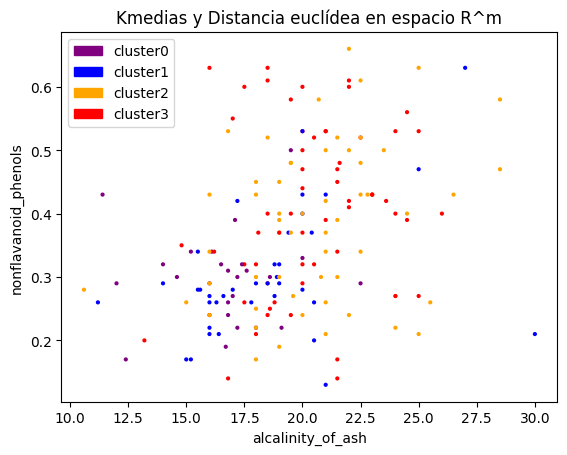

In [65]:
#import matplotlib.patches as mpatches

colores=['purple','blue','orange','red'] #un color por cada cluster encontrado
variables=datos.feature_names

variable1=variables[3]
variable2=variables[7]

f1 = df_clusters[variable1].values
f2 = df_clusters[variable2].values
f3 = df_clusters.kmedias_4

asignar=[]
l=len(f3)
print('se grafican de a dos (dimensión 2)')

for k in range(l): #for index, row in filtered_data.iterrows():
    asignar.append(colores[f3[k]-1])
    
plt.scatter(f1, f2, c=asignar, s=4)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label='cluster0')
patch2 = mpatches.Patch(color=colores[1], label='cluster1')
patch3 = mpatches.Patch(color=colores[2], label='cluster2')
patch4 = mpatches.Patch(color=colores[3], label='cluster3')
plt.legend(handles=[patch1,patch2,patch3,patch4])
plt.title('Kmedias y Distancia euclídea en espacio R^m')
plt.show()

**Normalizamos?, escalamos, estandarizamos las variables?** conviene primero escalar o estandarizar (z-score) por columna. Es decir: llevar a cada variable a un intervalo de valores común, es decir por columna.

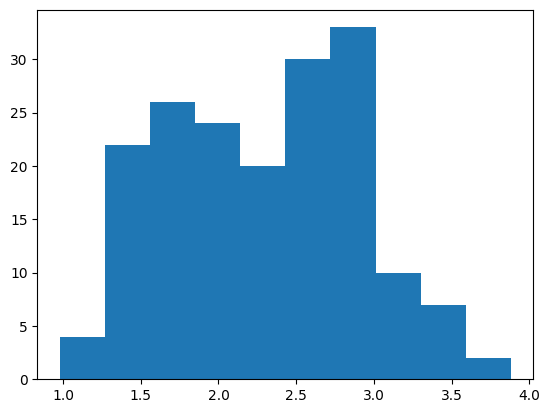

In [66]:
X=datos.data # datos puros
plt.hist(X[:,5]) #histograma de los datos de una variable o columna
plt.show()

In [67]:
from sklearn import preprocessing

std_scale=preprocessing.StandardScaler().fit(X) #resta la media  de cada columna y luego divide por el desvío
X_scaled=std_scale.transform(X) # media 0 y desvío 1 por columnas

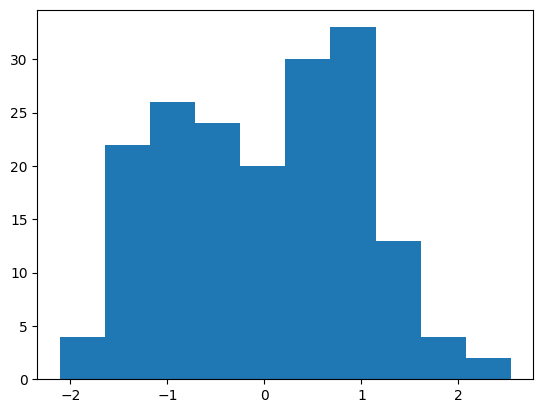

In [68]:
plt.hist(X_scaled[:,5]) #histograma de los datos de una variable (columna) luego de estandarizar
plt.show()

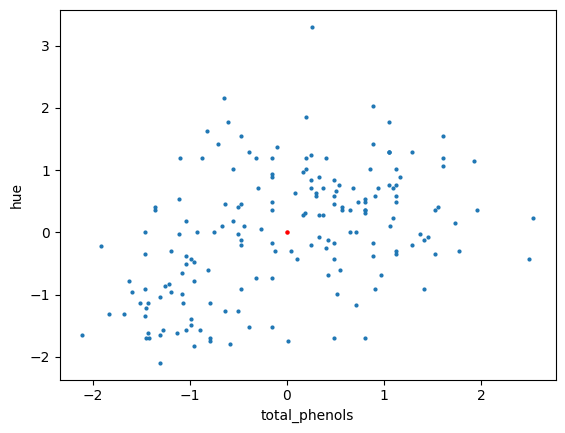

In [69]:
#scatterplot de los datos de dos variables (columnas) luego de estandarizar
nvar1=5
nvar2=10

plt.scatter(X_scaled[:,nvar1],X_scaled[:,nvar2], s=4)

plt.scatter(0,0,c='r', s=5) #centro de masa, media global, en rojo

plt.xlabel(variables[nvar1])
plt.ylabel(variables[nvar2])
plt.show()

In [71]:
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#### K-medias con base estandarizada

In [70]:
kmeans_n = KMeans(n_clusters=4)

kmeans_n.fit(X_scaled) #fiteo, ejecuto el algoritmo usando la base estandarizada o normalizada por columnas

df_clusters['kmedias_base_estadarizada']=kmeans_n.labels_
df_clusters.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kmedias_4,kmedias_base_estadarizada
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1


##### Ejercicio
 Graficar los nuevos resultados

##### Ejercicio 
 Aplicar k-medias pero utilizando 5 variables, no todas

##### Ejercicio para pensar...
 Cómo se analizan los resultados?

##### Elección de hiperparámetro k (Opcional)

según el criterio del codo ([Elbow method ](https://predictivehacks.com/k-means-elbow-method-code-for-python/#:~:text=K%2DMeans%20is%20an%20unsupervised,optimal%20for%20the%20specific%20case.))

#### Algo de Evaluación
En general la evaluación es "anecdótica", es ad hoc

Algunos tips:
- Muy importante la presencia de un experto de dominio. que conozca los datos. 
- analizar si los grupos encontrados tienen sentido, para esto hay que describirlos. 
- Analizar si son estables (al probar otras técnicas o hiperparámetros)
- Compararlos con alguna otra información extra asociada al interés de separar en grupos.


En este ejemplo (wine) cada registro ya está clasificado en una de 3 clases, es decir existe etiqueta, target 

Classes	3

Samples per class	[59,71,48]


In [16]:
print('y=',datos.target)
print(type(datos.target))
print(len(datos.target))
print(datos.target_names)

y= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
<class 'numpy.ndarray'>
178
['class_0' 'class_1' 'class_2']


Es decir:

$y_i \in \{\text{'class_0', 'class_1','class_2'} \}$
o bien

$y_i \in \{0,1,2\}$

**si queremos predecir esa etiqueta podemos usar aprendizaje supervizado**, lo veremos próxima clase



cantidad de observaciones: 178
cantidad de clases: 3
cantidad de variables/dimension: 13
se grafican de a dos (dimensión 2)


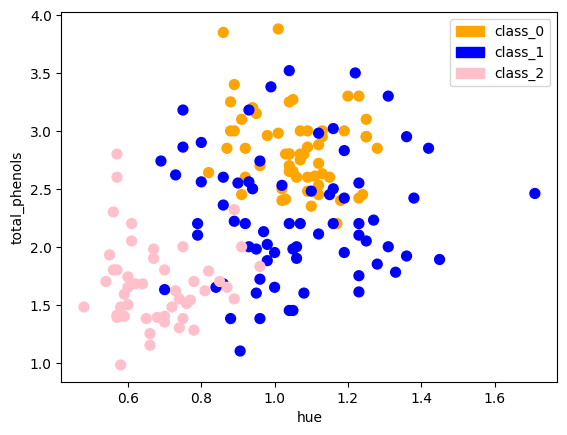

In [17]:
#import matplotlib.patches as mpatches
variable1=datos.feature_names[10]
variable2=datos.feature_names[5]

f1 = df[variable1].values
f2 = df[variable2].values
f3 = datos.target

colores=['orange','blue','pink']
# Vamos a pintar en colores las 3 clases: naranja: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de observaciones:',l)
print('cantidad de clases:',3)
print('cantidad de variables/dimension:',13)
print('se grafican de a dos (dimensión 2)')

for i in range(l): #for index, row in filtered_data.iterrows():
    if(f3[i]==0):
        asignar.append(colores[0])
    elif (f3[i]==1):
        asignar.append(colores[1])
    else:
        asignar.append(colores[2])
plt.scatter(f1, f2, c=asignar, s=50)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label=datos.target_names[0])
patch2 = mpatches.Patch(color=colores[1], label=datos.target_names[1])
patch3 = mpatches.Patch(color=colores[2], label=datos.target_names[2])
plt.legend(handles=[patch1,patch2,patch3])
plt.show()

Ahora usaremos ese conocimiento para evaluar/entender que encontró kmedias, no es fácil evaluar algoritmos no supervisados si no se tiene un conocimiento de dominio o de los datos.

Es muy importante el **conocimiento del experto**, entender/conocer los datos con los cuales se trabaja.

In [18]:
pd.crosstab(index=datos.target,
            columns=df_clusters['kmedias_4'])#, margins=True)

kmedias_4,0,1,2,3
row_0,,,,
0,6,30,23,0
1,22,4,0,45
2,31,5,0,12


In [19]:
pd.crosstab(index=datos.target,
            columns=df_clusters['kmedias_base_estadarizada']
            margins=True)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (651685504.py, line 2)

## Clasificación de imágenes 

Primero hay que identificar que tipo de clasificación se quiere realizar:

* **Dentro de una imagen (clasificación de pixeles, segmentación, detección)** o 
* **Asignar una imagen completa a una categoría (etiquetado, taggeo)**
* **Asignar una región de pixeles a una categoría (Clasificación basada en objetos (Object-Based Image Analysis – OBIA))**

Seguimos con Clasificación dentro de una imagen

Dividir a la imagen en regiones. Los objetos/muestras a clasificar son los pixeles. ¿Qué datos/variables/características/features tenemos (o podemos obtener) de cada pixel.

**Ejemplo: Imagen monocroma**

El ejemplo más simple es cuando la imagen es monocroma una sola medida para cada pixel: la intensidad.

**2 clases: binarización**

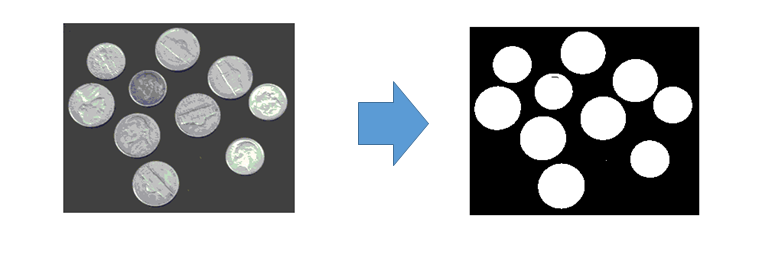

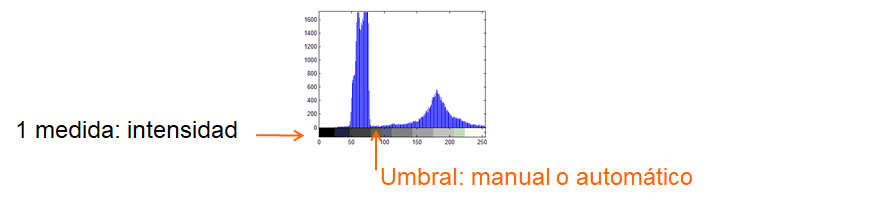

Les suena a mezcla de Gaussianas? o k-medias con k=2?

Cada pixel tiene un vector de datos o características, puede tener una, tres o más (características/datos).

**Ejemplos:** 

- Imágenes a color RGB,  cada pixel $(x_r, x_g, x_b)$, 3 variables
- Imágenes satelitales: cada pixel tiene B datos, donde B es la cantidad de bandas o sensores del satélite.

Se pueden usar las B bandas y/o combinaciones de éstas, como por ejemplo, el NDVI (índice verde o de vegetación). 

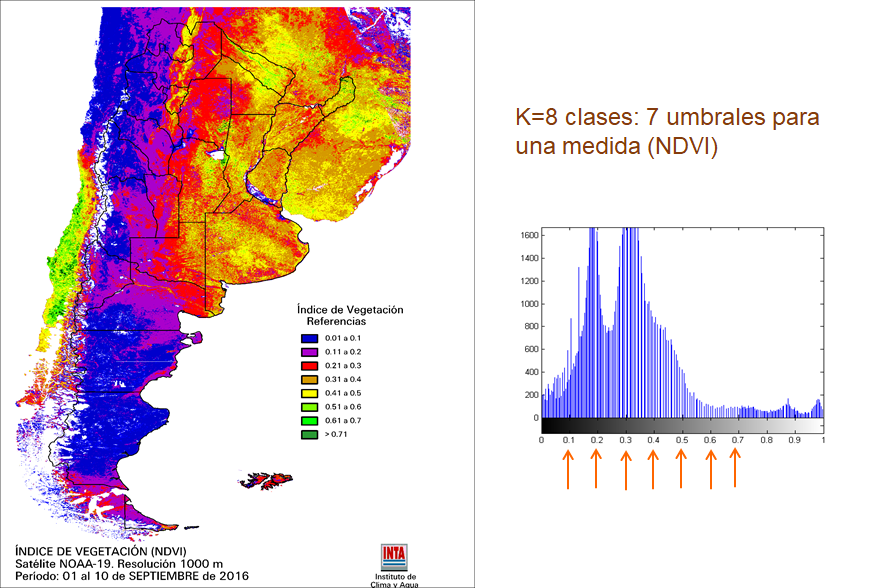


**Índice verde** en cada pixel obtenido de imágenes satelitales:

$$NDVI= \frac{(IRC-r)}{(IRC+r)}$$ 

donde $IRC$ es el Infrarrojo cercano 
y $r$ es la componente roja (del visible)

In [22]:
import cv2
campo_cv=cv2.imread('/Users/niconash/Desktop/Curso Imágenes Python/Imágenes necesarias/Campo.png') #en BGR
print(campo_cv.size, 'cantidad de datos')
print(campo_cv.shape,' dimensión de la imagen')
campo=campo_cv.copy()
campo[:,:,[2,1,0]]=campo_cv #pasamos a RGB

515883 cantidad de datos
(359, 479, 3)  dimensión de la imagen


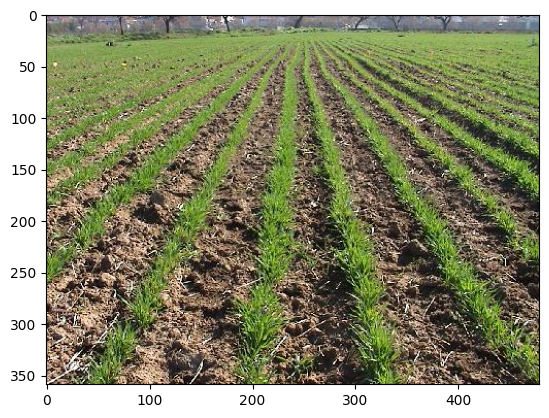

In [23]:
plt.imshow(campo)
plt.show()

In [24]:
print('un pixel particular, RGB:', campo[50,100,:])

un pixel particular, RGB: [119 125  77]


In [25]:
imagen=campo.copy()

##### RGB a DataFrame

In [26]:
#Pasamos a Data Frame # también pueden ver: https://stackoverflow.com/questions/49649215/pandas-image-to-dataframe Gracias Francisco!
dims=imagen.shape
cant_filas=dims[0]
cant_columnas=dims[1]
ind=np.indices((cant_filas,cant_columnas)) # arreglo con matriz de filas y  matriz de columnas

cant_pixeles=cant_filas*cant_columnas
columnas=np.zeros([cant_pixeles,5],dtype='int')

data0=np.zeros([cant_pixeles,5],dtype='int')
data0[:,0]=ind[0].flatten() #filas
data0[:,1]=ind[1].flatten() #columnas
data0[:,2]=imagen[:,:,0].flatten() #rojo
data0[:,3]=imagen[:,:,1].flatten() # verde
data0[:,4]=imagen[:,:,2].flatten() # azul

df = pd.DataFrame(data0, columns=["fila", "columna","rojo","verde","azul"])

print(df.shape)
print('Base de pixeles:')
df.head()        

(171961, 5)
Base de pixeles:


,fila,columna,rojo,verde,azul
0,0,0,186,155,161
1,0,1,202,171,176
2,0,2,190,159,165
3,0,3,203,172,177
4,0,4,189,160,164


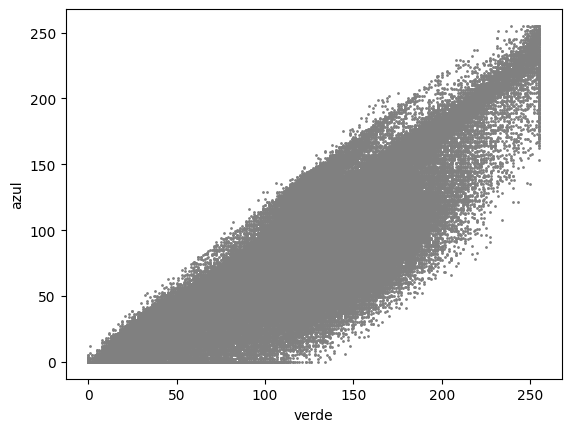

In [27]:
variables=["rojo","verde","azul"]

variable1=variables[1]
variable2=variables[2]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c='gray', s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()


<Figure size 640x480 with 0 Axes>

##### k-medias

Hacemos k-medias con k= 3 y veamos los resutados

In [29]:
X=data0[:,2:5] # sólo r,g,b

In [30]:
# Se agrupan los datos usando Kmedias en 3 clusters (cantidad elegida de forma arbitraria)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [31]:
# resultados
print(kmeans.labels_)
print(kmeans.labels_.shape)

[2 2 2 ... 1 1 1]
(171961,)


In [32]:
df_clusters=df.copy() #nuevo Data Frame
df_clusters['kmedias_3']=kmeans.labels_
df_clusters.head()

,fila,columna,rojo,verde,azul,kmedias_3
0,0,0,186,155,161,2
1,0,1,202,171,176,2
2,0,2,190,159,165,2
3,0,3,203,172,177,2
4,0,4,189,160,164,2


In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c=kmeans.labels_, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

<Figure size 640x480 with 0 Axes>

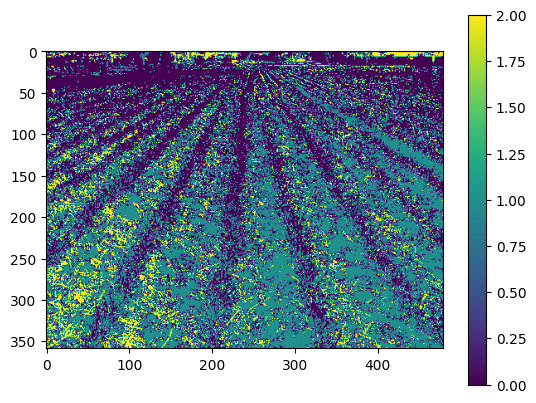

In [34]:
imagen_kmedias=np.reshape(kmeans.labels_, (cant_filas,cant_columnas))
plt.imshow(imagen_kmedias)
#plt.imshow(imagen_kmedias, cmap='gray')
#plt.title('imagen TRInaria')
plt.colorbar()
plt.show()

**Se pueden agregar más capas/columnas de datos, por ejemplo**

* **combinar capas: dif_r-g, diferencia entre rojo y azul**
* **una capa con los bordes (Filtros Prewitt, Sobel, etc.)**
* **una capa con información de textura (Filtros de Gabor, etc.)**

**Ejercicio: agregar alguna/s** tener en cuenta si las operaciones son pixel a pixel o necesitan filtros espaciales

In [35]:
df['dif_r-g']=df["rojo"]-df["verde"]
df.head()

,fila,columna,rojo,verde,azul,dif_r-g
0,0,0,186,155,161,31
1,0,1,202,171,176,31
2,0,2,190,159,165,31
3,0,3,203,172,177,31
4,0,4,189,160,164,29


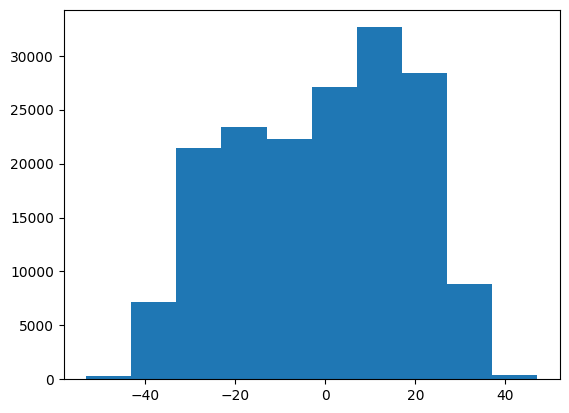

In [36]:
#Histograma
plt.hist(df['dif_r-g'])
plt.show()

Ejercicio: agregar variables al Data frame


In [37]:
df['dif_r-b']=df["rojo"]-df["azul"]
df.head()

,fila,columna,rojo,verde,azul,dif_r-g,dif_r-b
0,0,0,186,155,161,31,25
1,0,1,202,171,176,31,26
2,0,2,190,159,165,31,25
3,0,3,203,172,177,31,26
4,0,4,189,160,164,29,25


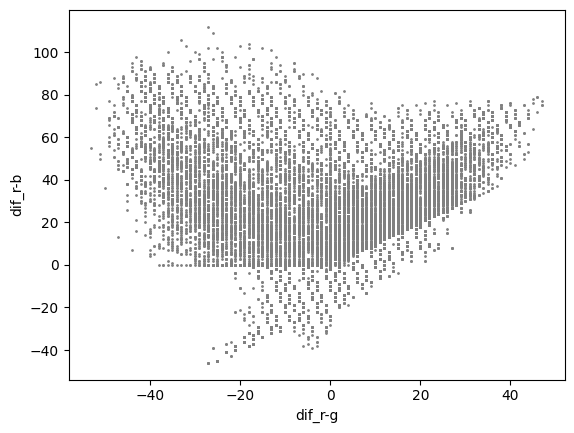

In [38]:
f1 = df['dif_r-g'].values
f2 = df['dif_r-b'].values

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel('dif_r-g')
plt.ylabel('dif_r-b')
plt.show()

In [39]:
X_nuevo=np.zeros([cant_pixeles,2],dtype='int')# sólo con las 2 últimas columnas

X_nuevo[:,0]=data0[:,2]-data0[:,3]# r-g
X_nuevo[:,1]=data0[:,2]-data0[:,4]# r-b
#data0[:,2]=imagen[:,:,0].flatten() #rojo
#data0[:,3]=imagen[:,:,1].flatten() # verde
#data0[:,4]=imagen[:,:,2].flatten() # azul
print(X_nuevo.shape)
print(X_nuevo)

(171961, 2)
[[ 31  25]
 [ 31  26]
 [ 31  25]
 ...
 [ -6  32]
 [ -8  33]
 [-11  32]]


##### Con "nuevos" datos

In [40]:
# Se agrupan los datos usando Kmedias en 3 clusters (cantidad elegida de forma arbitraria)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_nuevo)

KMeans(n_clusters=3)

In [41]:
# resultados
print(kmeans.labels_)
print(kmeans.labels_.shape)

[2 2 2 ... 1 0 0]
(171961,)


#### Ejercicio
Hacer el scatterplot de los datos utilizados, pintado con los grupos encontrados

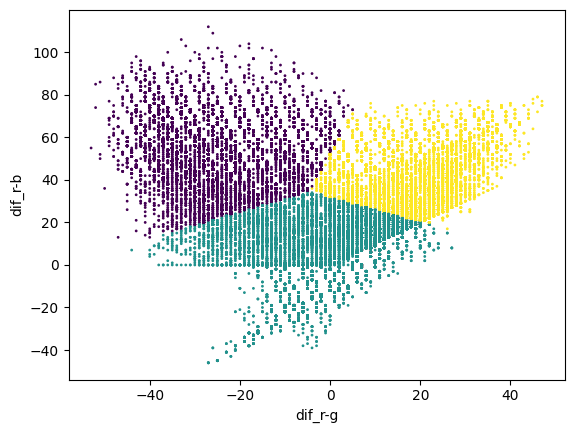

In [42]:
f1 = df['dif_r-g'].values
f2 = df['dif_r-b'].values
f3= kmeans.labels_

plt.scatter(f1, f2,c=f3, s=1)
plt.xlabel('dif_r-g')
plt.ylabel('dif_r-b')
plt.show()

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c=kmeans.labels_, s=1)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])
plt.show()

<Figure size 640x480 with 0 Axes>

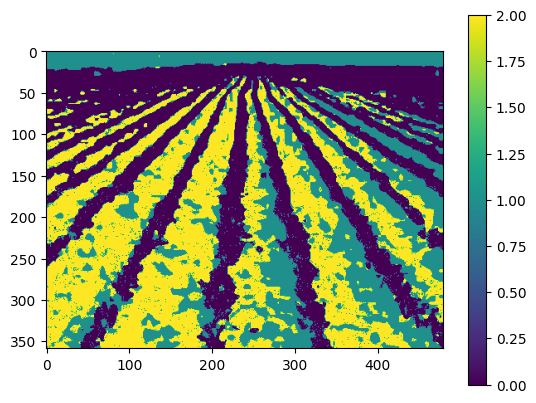

In [44]:
imagen_kmedias=np.reshape(kmeans.labels_, (cant_filas,cant_columnas))
plt.imshow(imagen_kmedias)
#plt.imshow(imagen_kmedias, cmap='gray')
#plt.title('imagen TRInaria')
plt.colorbar()
plt.show()

### Usando Descomposición ACP (Opcional)

o PCA (Principal Components Analisis)

Análisis de Componentes Principales

In [45]:
X=data0[:,2:5] # sólo r,g,b
std_scale=preprocessing.StandardScaler().fit(X)
X_scaled=std_scale.transform(X) # numpyarray normalizado por columna

In [46]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=3) #elegimos 3  pueden ser menos, 

pca.fit(X_scaled) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(X_scaled) #numpy array
print ('tamaño de los datos: ', X_projected.shape)

proporción de varianza por componente:  [0.93792779 0.05185796 0.01021425]
proporción de varianza por componente acumulada:  [0.93792779 0.98978575 1.        ]
tamaño de los datos:  (171961, 3)


**Ejercicio: graficar componentes 2 y 3**

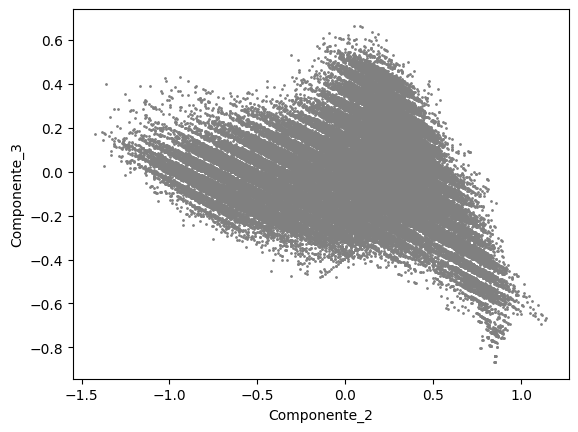

In [47]:
variable1="Componente_2"
variable2="Componente_3"

f1 = X_projected[:,1]
f2 = X_projected[:,2]

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

Ejercicio: Agregarlas al Data Frame (Tarea)

**Ejercicio: realizar k-medias usando sólo las componentes 2 y 3, con k =3, mostrar el resultado en una nueva imagen de clases**

### Ejercicio: llevar la imagen Daisy a Data Frame y graficar en el espacio RGB o, mejor, 
generar una función que tome una imagen RGB y la pase a Data Frame y aplicárselo a Daisy.

In [49]:
flor_cv=cv2.imread('/Users/niconash/Desktop/Curso Imágenes Python/Imágenes necesarias/daisy.jpg')
print(flor_cv.shape)
flor=flor_cv.copy()
flor[:,:,[2,1,0]]=flor_cv

(354, 364, 3)


### TAREA para entregar en el AV hasta el 31/11

Segmentar la imagen RGB daisy.jpg en 2 y 3 regiones usando aprendizaje no supervisado 